In [7]:
from qiskit import QuantumRegister
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import ClassicalRegister,  transpile
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit import BasicAer
from qiskit import BasicAer, execute
import statistics
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)
import matplotlib.pyplot as plt

In [8]:
def variance (theta,reps, epg):
    p1Q = epg*0.1
    p2Q = epg
    qr = QuantumRegister(7,'a')
    cr = ClassicalRegister(1,'creg')
    qc = QuantumCircuit(qr,cr)
    for i in range(0,7):
        qc.ry(theta[i],qr[i])
    for i in range(0,6):
        qc.cu(theta[i],0,0,0, qr[i], qr[6])
    qc.measure(6,0)
    job = execute(qc, BasicAer.get_backend('qasm_simulator'), shots=reps)
    hist = job.result().get_counts()
    #Analysis of the output for multiple runs
    prob_1a = []
    for expt in range(1,10):
        job = execute(qc, BasicAer.get_backend('qasm_simulator'), shots=reps)
        prob_1a.append(job.result().get_counts()['1']/reps)
    theta = [np.pi/8, np.pi/4, np.pi/2, -np.pi/4, np.pi/2, np.pi, np.pi/2, np.pi/2]
    qr = QuantumRegister(7,'a')
    cr = ClassicalRegister(1,'creg')
    qc = QuantumCircuit(qr,cr)
    for i in range(0,7):
        qc.ry(theta[i],qr[i])
    for i in range(0,6):
        qc.cu(theta[i],0,0,0, qr[i], qr[6])
    qc.measure(6,0)
    error_1 = noise.depolarizing_error(p1Q, 1)
    error_2 = noise.depolarizing_error(p2Q, 2)
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['x','z','h','ry'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx','cu'])
    error_gate1 = pauli_error([('X',p2Q), ('I', 1 - p2Q)])
    #error_gate2 = error_gate1.tensor(error_gate1)
    error_reset = pauli_error([('X', p1Q), ('I', 1 - p1Q)])
    error_meas = pauli_error([('X',p1Q), ('I', 1 - p1Q)])
    noise_model.add_all_qubit_quantum_error(error_reset, "reset")
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    basis_gates = noise_model.basis_gates
    prob_1b = []
    for expt in range(1,10):
        result = execute(qc, Aer.get_backend('qasm_simulator'),
                         basis_gates=basis_gates,
                         noise_model=noise_model, shots=reps).result().get_counts(0)
        prob_1b.append(result['1']/reps)
    def nonlocal_gate(qc, ctrl_qubit, target_qubit, comm_1, comm_2, theta):
        qc.h(comm_1)
        qc.cx(comm_1,comm_2)
        qc.cx(ctrl_qubit,comm_1)
        qc.measure(comm_1,0)
        qc.x(comm_2).c_if(cr[0], 1)
        qc.cu(theta,0,0,0,comm_2, target_qubit)
        qc.h(comm_2)
        qc.measure(comm_2,1)
        qc.z(ctrl_qubit).c_if(cr[1], 1)
        qc.reset(qr[7])
        qc.reset(qr[8])
        return qc

    qr = QuantumRegister(9,'a')
    cr = ClassicalRegister(2,'creg')
    qc = QuantumCircuit(qr,cr)

    theta = [np.pi/8, np.pi/4, np.pi/2, -np.pi/4, np.pi/2, np.pi, np.pi/2, np.pi/2]
    for i in range(0,7):
        qc.ry(theta[i],qr[i])
    for i in range(0,6):
        nonlocal_gate(qc, qr[i], qr[6], qr[7], qr[8],theta[i])
    qc.measure(6,0)
    prob_2a = []
    for expt in range(1,10):
        job = execute(qc, BasicAer.get_backend('qasm_simulator'), shots=reps) 
        hist = job.result().get_counts()
        a_0 = []
        a_1 = []
        key = list(hist.keys())
        val = list(hist.values())
        for i in range(len(key)):
            if '1' in key[i][1]:
                a_1.append(val[i])
            elif '0' in key[i][1]:
                a_0.append(val[i])
        hist={}
        hist['0'] = sum(a_0)
        hist['1'] = sum(a_1) 
        prob_2a.append(hist['1']/reps)
    def nonlocal_gate(qc, ctrl_qubit, target_qubit, comm_1, comm_2, theta):
        qc.h(comm_1)
        qc.cx(comm_1,comm_2)
        qc.cx(ctrl_qubit,comm_1)
        qc.measure(comm_1,0)
        qc.x(comm_2).c_if(cr[0], 1)
        qc.cu(theta,0,0,0,comm_2, target_qubit)
        qc.h(comm_2)
        qc.measure(comm_2,1)
        qc.z(ctrl_qubit).c_if(cr[1], 1)
        qc.reset(qr[7])
        qc.reset(qr[8])
        return qc

    qr = QuantumRegister(9,'a')
    cr = ClassicalRegister(2,'creg')
    qc = QuantumCircuit(qr,cr)

    theta = [np.pi/8, np.pi/4, np.pi/2, -np.pi/4, np.pi/2, np.pi, np.pi/2, np.pi/2]
    for i in range(0,7):
        qc.ry(theta[i],qr[i])
    for i in range(0,6):
        nonlocal_gate(qc, qr[i], qr[6], qr[7], qr[8],theta[i])
    qc.measure(6,0)
    error_1 = noise.depolarizing_error(p1Q, 1)
    error_2 = noise.depolarizing_error(p2Q, 2)
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['x','z','h','ry'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx','cu'])
    error_gate1 = pauli_error([('X',p2Q), ('I', 1 - p2Q)])
    #error_gate2 = error_gate1.tensor(error_gate1)
    error_reset = pauli_error([('X', p1Q), ('I', 1 - p1Q)])
    error_meas = pauli_error([('X',p1Q), ('I', 1 - p1Q)])
    noise_model.add_all_qubit_quantum_error(error_reset, "reset")
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    basis_gates = noise_model.basis_gates

    var= []
    prob_2b = []
    for expt in range(1,10):
        result = execute(qc, Aer.get_backend('qasm_simulator'),
                         basis_gates=basis_gates,
                         noise_model=noise_model, shots=reps).result().get_counts(0)
        a_0 = []
        a_1 = []
        key = list(result.keys())
        val = list(result.values())
        for i in range(len(key)):
            if '1' in key[i][1]:
                a_1.append(val[i])
            elif '0' in key[i][1]:
                a_0.append(val[i])
        hist={}
        hist['0'] = sum(a_0)
        hist['1'] = sum(a_1) 
        prob_2b.append(hist['1']/reps)
    return prob_1a,prob_1b,prob_2a,prob_2b

In [9]:
theta = [np.pi/8, 0, 0, -np.pi/4, np.pi/2, np.pi, np.pi/2, 0]
mean_1=[]
mean_2=[]
mean_3=[]
xax = []
n_shots = 1000
for epg in np.arange(0.01,0.1,0.01):
    print(epg)
    prob_1a,prob_1b,prob_2a,prob_2b = variance(theta,n_shots,epg)
    mean_1.append(statistics.mean(np.subtract(prob_1a,prob_1b)))
    mean_2.append(statistics.mean(np.subtract(prob_1a,prob_2a)))
    mean_3.append(statistics.mean(np.subtract(prob_1a,prob_2b)))
    xax.append(epg)

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09


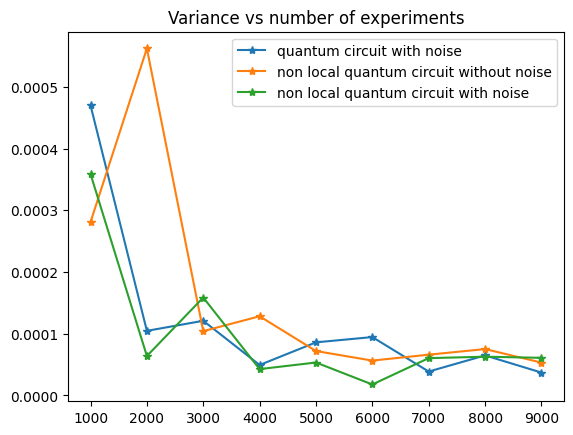

In [36]:
plt.plot(xax,variance_1, '*-')
plt.plot(xax,variance_2, '*-')
plt.plot(xax,variance_3, '*-')
plt.title("Variance vs number of experiments")
plt.legend(["quantum circuit with noise", "non local quantum circuit without noise", "non local quantum circuit with noise"])

In [ ]:
#1. number of qubits - scalibility
#2. depth of the circuit - parallel (t1 - gates1, t2 - gates2)

In [3]:
prob_1a = [0.27, 0.286, 0.267, 0.25, 0.25, 0.266, 0.266, 0.294, 0.275]
prob_1b = [0.2786666666666667, 0.2783333333333333, 0.27616666666666667, 0.2826666666666667, 0.2861666666666667, 0.283, 0.2788333333333333, 0.28783333333333333, 0.29583333333333334]


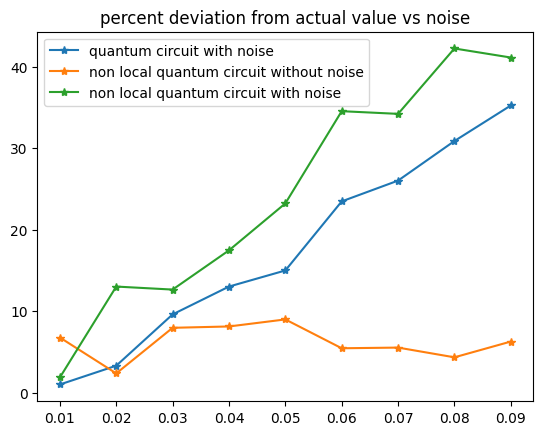

In [10]:
plt.plot(xax,np.abs(mean_1)*100/0.27, '*-')
plt.plot(xax,np.abs(mean_2)*100/0.27, '*-')
plt.plot(xax,np.abs(mean_3)*100/0.27, '*-')
plt.title("percent deviation from actual value vs noise")
plt.legend(["quantum circuit with noise", "non local quantum circuit without noise", "non local quantum circuit with noise"])